# Import Library and CSV

In [1]:
!pip install pingouin

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pingouin as pg

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment/Day 10/marketing_campaign.csv', sep='\t')
data.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
53,2225,1977,Graduation,Divorced,82582.0,0,0,07-06-2014,54,510,...,1,1,0,0,1,0,0,3,11,1
1186,10466,1965,Graduation,Married,44393.0,1,1,22-08-2013,86,24,...,4,0,0,0,0,0,0,3,11,0
786,1135,1960,Master,Together,17144.0,1,1,15-02-2014,96,18,...,7,0,0,0,0,0,0,3,11,0
104,8908,1959,Graduation,Married,87195.0,0,0,08-05-2014,35,217,...,1,0,0,0,0,0,0,3,11,1
1209,945,1965,Graduation,Together,36317.0,0,1,22-05-2013,53,87,...,7,0,0,0,0,0,0,3,11,0


# 1. Eksplorasi dan Statistik Deskriptif

## Gambaran Data Secara Umum

In [4]:
data.shape

(2240, 29)

In [5]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Terhitung untuk Education berjumlah 2240 sedangkan untuk Income berjumlah 2216. Artinya terdapat 24 data NaN di column Income

In [7]:
data.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


## Gambaran Data Education dan Income

In [8]:
data[['Education', 'Income']].describe(include='all')

,Education,Income
count,2240,2216.000000
unique,5,NaN
top,Graduation,NaN
freq,1127,NaN
mean,NaN,52247.251354
std,NaN,25173.076661
min,NaN,1730.000000
25%,NaN,35303.000000
50%,NaN,51381.500000
75%,NaN,68522.000000


Kembali dapat dilihat terdapat perbedaan count antara Education dengan Income

### Visualisasi Persebaran Data pada Kategori Education


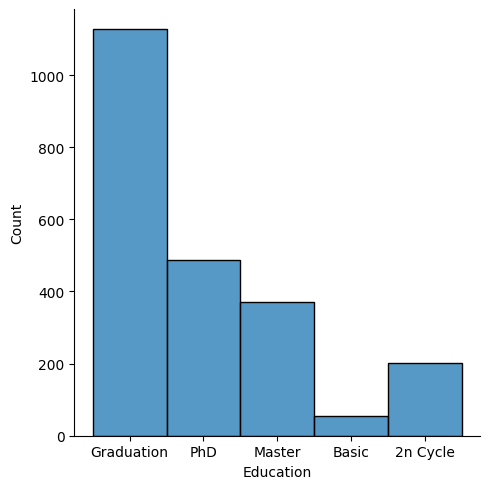

In [9]:
sns.displot(data['Education'])
plt.show()

Dari hasil visualisasi, data untuk graduation sangat tinggi dibandingkan kategori lain. Sedangkan data untuk kategori basic terlalu rendah dibandingkan kategori yang lain.

### Visualisasi Persebaran Data Income

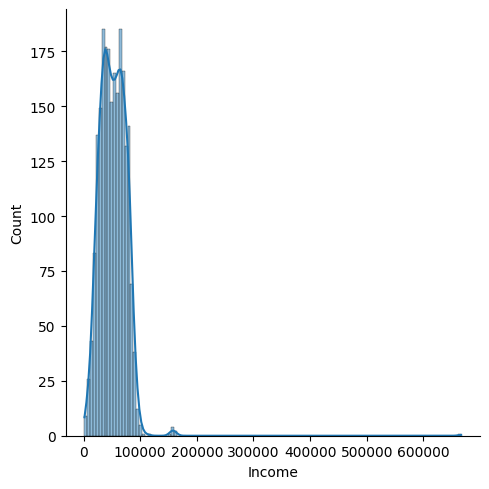

In [10]:
sns.displot(data['Income'], kde=True)
plt.show()

Dari hasil visualisasi, kebanyakan persebaran data terdapat di income < 100.000 (Positif Skew)

### Visualisasi Boxplot Education dengan Income

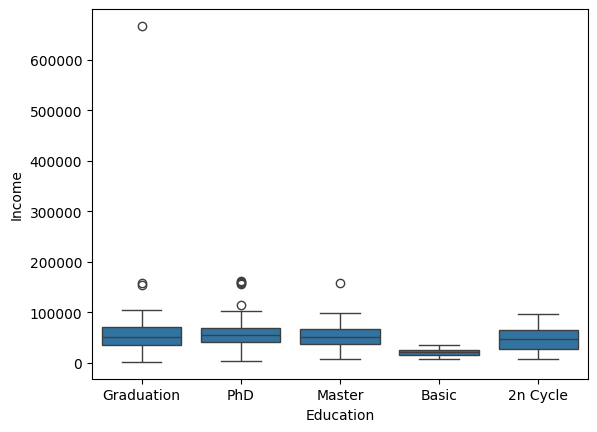

In [11]:
sns.boxplot(data=data, x='Education', y='Income')
plt.show()

Dari hasil visualisasi boxplot, terdapat data outliers dan boxplot basic lebih sempit dari data boxplot yang lain

**Mencari data Outliers :**

In [12]:
# Mencari data ouliers
def get_outliers(group):
    Q1 = group['Income'].quantile(0.25)
    Q3 = group['Income'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group['Income'] < lower_bound) | (group['Income'] > upper_bound)]

outliers = data.groupby('Education').apply(get_outliers)

outliers_index = outliers.index.get_level_values(1)

outliers

<ipython-input-12-d81309c74995>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers = data.groupby('Education').apply(get_outliers)


ID  Year_Birth   Education Marital_Status    Income  \
Education                                                                 
Graduation 655    5555        1975  Graduation       Divorced  153924.0   
           1653   4931        1977  Graduation       Together  157146.0   
           2233   9432        1977  Graduation       Together  666666.0   
Master     1300   5336        1971      Master       Together  157733.0   
PhD        164    8475        1973         PhD        Married  157243.0   
           617    1503        1976         PhD       Together  162397.0   
           687    1501        1982         PhD        Married  160803.0   
           1898   4619        1945         PhD         Single  113734.0   
           2132  11181        1949         PhD        Married  156924.0   

                 Kidhome  Teenhome Dt_Customer  Recency  MntWines  ...  \
Education                                                          ...   
Graduation 655         0         0  07-02-2014       81         1  ...   
           1653        0         0  29-04-2013       13         1  ...   
           2233        1         0  02-06-2013       23         9  ...   
Master     1300        1         0  04-06-2013       37        39  ...   
PhD        164         0         1  01-03-2014       98        20  ...   
           617         1         1  03-06-2013       31        85  ...   
           687         0         0  04-08-2012       21        55  ...   
           1898        0         0  28-05-2014        9         6  ...   
           2132        0         0  29-08-2013       85         2  ...   

                 NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Education                                                                      
Graduation 655                   0             0             0             0   
           1653                  1             0             0             0   
           2233                  6             0             0             0   
Master     1300                  1             0             0             0   
PhD        164                   0             0             0             0   
           617                   1             0             0             0   
           687                   0             0             0             0   
           1898                  1             0             0             0   
           2132                  0             0             0             0   

                 AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
Education                                                              
Graduation 655              0             0         0              3   
           1653             0             0         0              3   
           2233             0             0         0              3   
Master     1300             0             0         0              3   
PhD        164              0             0         0              3   
           617              0             0         0              3   
           687              0             0         0              3   
           1898             0             0         0              3   
           2132             0             0         0              3   

                 Z_Revenue  Response  
Education                             
Graduation 655          11         0  
           1653         11         0  
           2233         11         0  
Master     1300         11         0  
PhD        164          11         0  
           617          11         0  
           687          11         0  
           1898         11         0  
           2132         11         0  

[9 rows x 29 columns]

### Data Cleaning

**Before :**

In [13]:
data[['Education', 'Income']].describe(include='all')

,Education,Income
count,2240,2216.000000
unique,5,NaN
top,Graduation,NaN
freq,1127,NaN
mean,NaN,52247.251354
std,NaN,25173.076661
min,NaN,1730.000000
25%,NaN,35303.000000
50%,NaN,51381.500000
75%,NaN,68522.000000


**Drop rows outliers dan na :**

In [14]:
data=data.dropna(subset=['Income'])
data = data[~data.index.isin(outliers_index)]

**After :**

In [15]:
data[['Education', 'Income']].describe(include='all')

,Education,Income
count,2207,2207.000000
unique,5,NaN
top,Graduation,NaN
freq,1113,NaN
mean,NaN,51605.500227
std,NaN,20675.819171
min,NaN,1730.000000
25%,NaN,35196.000000
50%,NaN,51287.000000
75%,NaN,68277.500000


### Hasil Data Cleaning

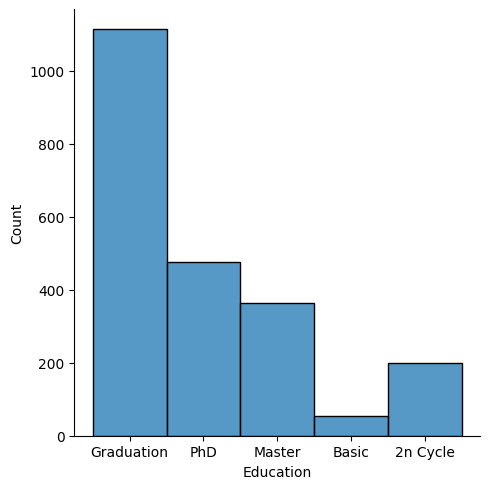

In [16]:
sns.displot(data['Education'])
plt.show()



*   Mayoritas individu memiliki education Graduation, dengan jumlah lebih dari 1.000 orang
*   Basic jumlahnya sangat kecil dibandingkan dengan yang lain

bisa diasumsikan bahwa populasi ini cukup terdidik secara umum

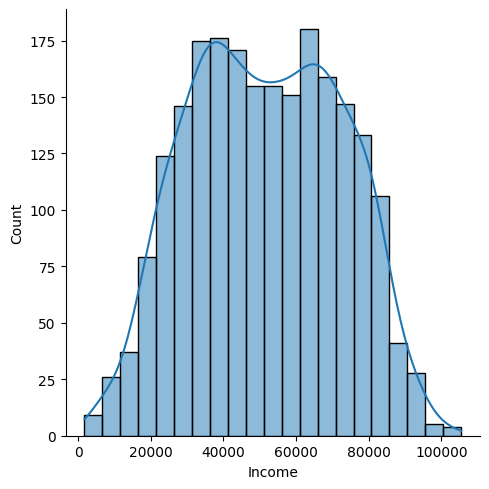

In [17]:
sns.displot(data['Income'], kde=True)
plt.show()



*   Data pendapatan memiliki distribusi yang mendekati bentuk normal (bell-shaped)
*   Income berkisar dari sekitar 0 hingga 100.000
*   Sebagian besar individu memiliki income di antara 30.000 hingga 70.000
*   Ada dua puncak kecil, yang bisa mengindikasikan dua subkelompok dalam data




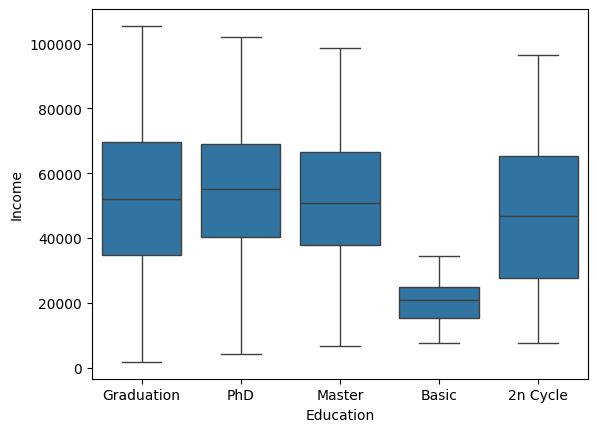

In [18]:
sns.boxplot(data=data, x='Education', y='Income')
plt.show()



*   Basic memiliki median income terendah di antara semua tingkat education
*   Semua kategori education di luar Basic menunjukkan sebaran income yang luas, dari rendah hingga sangat tinggi, sedangkan Basic memiliki sebaran income yang jauh lebih kecil
*   Secara umum, terdapat kecenderungan bahwa semakin tinggi education seseorang, semakin besar variasi dan potensi income yang dapat dicapai
*   Education Basic sangat membatasi potensi income





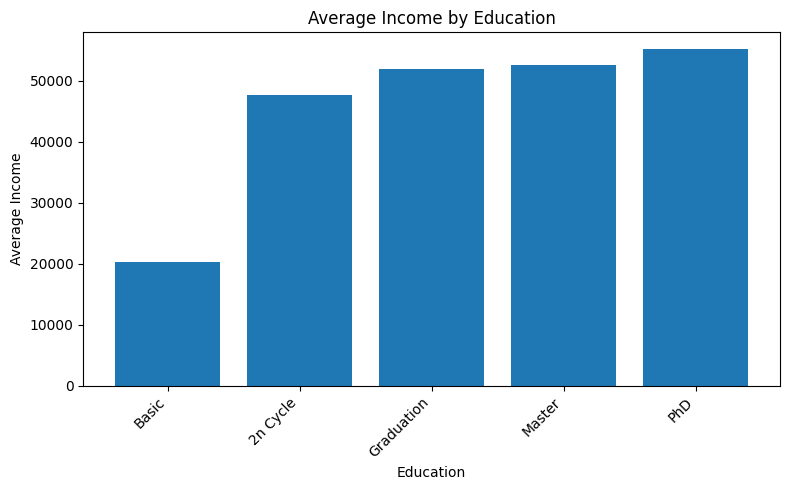

In [19]:
# Rata-rata income berdasarkan kategori education
avg_income = data.groupby('Education')['Income'].mean().sort_values()
plt.figure(figsize=(8,5))
plt.bar(avg_income.index, avg_income.values)
plt.title('Average Income by Education')
plt.xlabel('Education')
plt.ylabel('Average Income')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



*   Basic memiliki rata-rata income terendah, sekitar 20.000
*   Graduation, Master, dan PhD memiliki rata-rata income yang lebih tinggi, berkisar > 50.000
*   Terlihat bahwa semakin tinggi jenjang education, semakin tinggi pula rata-rata incomenya




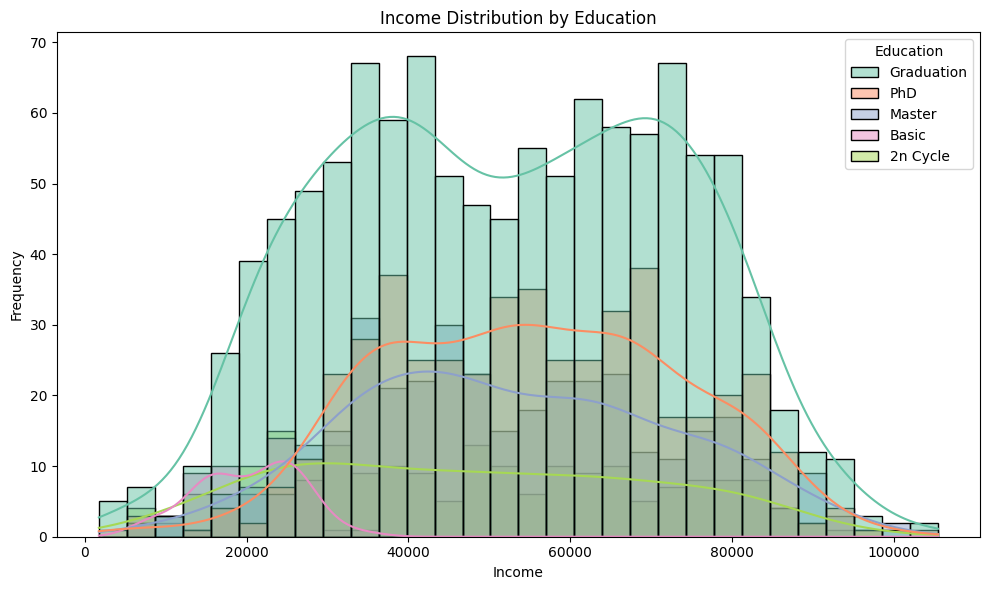

In [20]:
plt.figure(figsize=(10,6))

# Plot distribusi pendapatan berdasarkan kategori education
sns.histplot(data=data, x='Income', hue='Education', kde=True, bins=30, palette='Set2')

# Penambahan judul dan label
plt.title('Income Distribution by Education')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.tight_layout()

plt.show()

Graduation adalah kategori paling umum dan memberikan peluang income yang baik

# Uji Hipotesis

## Tujuan Analisis



Ingin mengetahui apakah education memengaruhi rata-rata income.

## Hipotesis



*   H0 : education tidak berpengaruh terhadap income
*   H1 : education berpengaruh terhadap income

## Pemilihan Metode Uji Hipotesis

*   Jumlah kelompok education > 2
*   Income berdistribusi normal dalam tiap kelompok


Maka metode uji hipotesis yang digunakan adalah ANOVA

## Uji ANOVA

In [21]:
# one-way ANOVA
anova_res = data.anova(dv='Income', between='Education', detailed=True)
anova_res.loc[:,['Source','SS','DF','MS','F','p-unc']]

,Source,SS,DF,MS,F,p-unc
0,Education,6.260205e+10,4,1.565051e+10,39.142289,1.060438e-31
1,Within,8.804398e+11,2202,3.998364e+08,NaN,NaN


Karena p-value jauh < 0.05, menolak H0 (yang menyatakan  education tidak berpengaruh terhadap income)



## What if drop basic education

Ketika melihat dari persebaran data, education basic memiliki persebaran data yang jauh lebih kecil dibandingkan kategori yang lain.

Sehingga dicoba melakukan uji Anova tanpa mengikutsertakan education Basic

In [22]:
# Membuat df baru tanpa kategori Basic
data_without_basic = data[data['Education'] != 'Basic']
data_without_basic['Education'].unique()

array(['Graduation', 'PhD', 'Master', '2n Cycle'], dtype=object)

In [23]:
# one-way ANOVA
anova_res = data_without_basic.anova(dv='Income', between='Education', detailed=True)
anova_res.loc[:,['Source','SS','DF','MS','F','p-unc']]

,Source,SS,DF,MS,F,p-unc
0,Education,8.374538e+09,3,2.791513e+09,6.829579,0.00014
1,Within,8.783794e+11,2149,4.087386e+08,NaN,NaN


Karena p-value jauh < 0.05, menolak H0 (yang menyatakan  education tidak berpengaruh terhadap income)


# Interpretasi dan Kesimpulan



*   Hasil uji ANOVA menunjukkan bahwa terdapat perbedaan signifikan rata-rata income berdasarkan tingkat education (p = 1.060438e-31). Ini menunjukkan bahwa tingkat education berpengaruh terhadap income individu.
*   Ketika education basic di exclude dari uji hipotesis Anova, hasilnya masih menunjukkan bahwa terdapat perbedaan signifikan rata-rata income berdasarkan tingkat education (p = 0.00014)
*   Jika ingin mendapatkan income yang optimal, direkomendasikan agar memiliki education yang tinggi
*   Langkah selanjutnya dalam penelitian yang dapat dilakukan adalah melakukan uji hipotesis lebih jauh untuk menentukan education yang tepat untuk mendapatkan income yang terbaik
